# Notebook to read WOFS

## First import module

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset 
from glob import glob

## Read the file

In [69]:
f = glob("/g/data/fk4/wofs/current/extents/113_-024/*nc")

In [70]:
nc = Dataset(f[0])

In [71]:
nc

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    date_created: 2016-03-15T21:46:56.687888
    Conventions: CF-1.6
    dimensions(sizes): latitude(4000), longitude(4000), time(618)
    variables(dimensions): int32 crs(), float64 latitude(latitude), float64 longitude(longitude), float64 time(time), int8 Data(latitude,longitude,time)
    groups: 

## get the data

In [72]:
h = nc.variables['Data'][:,:,50] # get the data for all lat and lon at time 50
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]

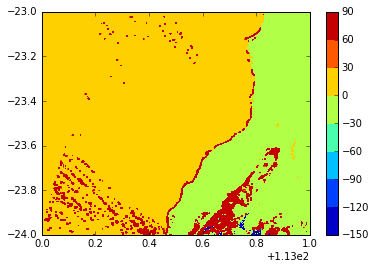

In [100]:
plt.contourf(lon, lat, h ) 
# the data values represent the Ture or False for each of the 8 conditions: water present, cloud...
plt.colorbar()

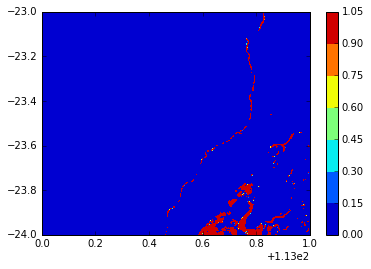

In [73]:
plt.contourf(lon, lat, (h & 2**7  ) / 2**7 ) # convert the data to 0-1 and plot where there is water
plt.colorbar()

## Some explanation about the bits

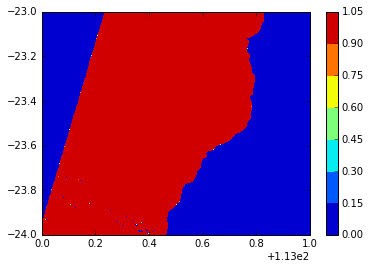

In [109]:
h & 2**2 # to find out where pixel mased out due to sea(bit 2)
(h & 2**2)/2**2 # convert the values to 0-1
plt.contourf(lon, lat, (h & 2**2) / 2**2 ) # convert the data to 0-1 and plot where there is water
plt.colorbar()

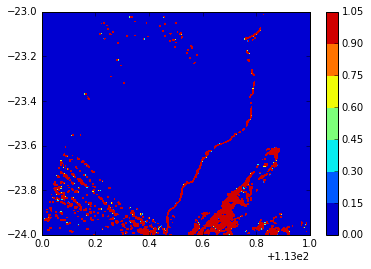

In [110]:
# plot where pixel masked out due to cloud 
plt.contourf(lon, lat, (h & ( 2**6) ) / (2**6 )) 
plt.colorbar()

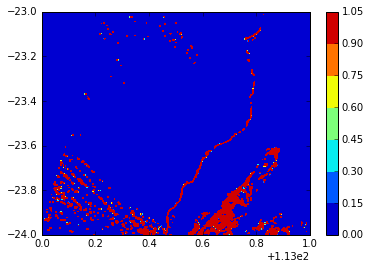

In [125]:
# plot where pixel masked out due to cloud and cloud shadow
plt.contourf(lon, lat, (h &  2**6)/(2**6) + ( h & 2**5)/(2**5))
plt.colorbar()

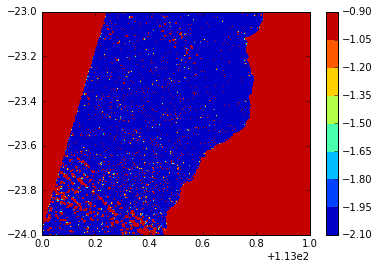

In [126]:
# plot pixels are not sea
plt.contourf(lon, lat, ~(h &  2**2)/(2**2))
plt.colorbar()